# Learning curve example

### Generating learning curves
** training set vs validation set performance **

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from learning_curve import learning_curve

### Linear regression

** Generate datasets **

In [2]:
size = 1000

# training set
coefficients = [6.2,-1.4,2.1,-3,11,-8]
x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    x[:,i]=np.random.rand(size)
y = (x*coefficients).sum(axis=1) + np.random.normal(size=size)

# validation set
v_x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    v_x[:,i]=np.random.rand(size)
v_y = (v_x*coefficients).sum(axis=1) + np.random.normal(size=size)

In [3]:
from linear_regressor import LinearRegressor
reg = LinearRegressor()

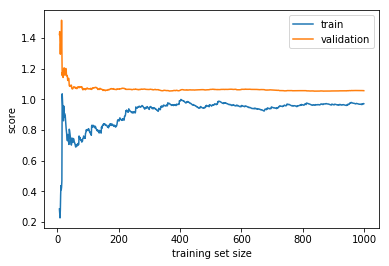

In [4]:
# generate learning curve
lc = learning_curve(reg,x,y,v_x,v_y)

# plot learning curves
plt.plot(lc[:,0],lc[:,1],label='train')
plt.plot(lc[:,0],lc[:,2],label='validation')
plt.xlabel('training set size')
plt.ylabel('score')
plt.legend()
plt.show()

Note - score for linear regression is mean-squared-error. The lower the better

### Logistic regression

** Generate datasets **

In [12]:
size = 300

coefficients = [0,-1.4,2.1,-3,10,-8]
x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    x[:,i]=np.random.rand(size)
y = np.round(np.vectorize(lambda x: 1/(1+np.exp(-x)))
             ((x*coefficients).sum(axis=1) + np.random.normal(size=size)))

t_x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    t_x[:,i]=np.random.rand(size)
t_y = np.round(np.vectorize(lambda x: 1/(1+np.exp(-x)))
               ((t_x*coefficients).sum(axis=1) + np.random.normal(size=size)))

** Fitting parameters can be passed to learning_curve function as a dictionary **

In [6]:
from logistic_regressor import LogisticRegressor
log = LogisticRegressor()
fit_param = {'learning_rate':0.01,'epochs':100}

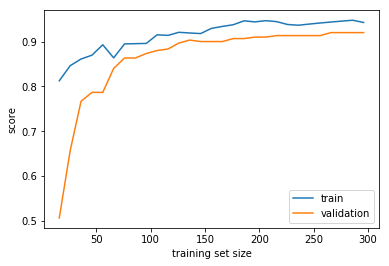

In [13]:
# generate learning curves
lc = learning_curve(log,x,y,t_x,t_y,10,fitting_params=fit_param)

# plot curves
plt.plot(lc[:,0],lc[:,1],label='train')
plt.plot(lc[:,0],lc[:,2],label='validation')
plt.xlabel('training set size')
plt.ylabel('score')
plt.legend()
plt.show()

Note - score in logistic regression is total accuracy. The higher the better